In [349]:
import os, os.path

dir_path = "./data/src"
valid_images = [".jpg",".gif",".png",".tga"]

image_paths = os.listdir(dir_path)
image_paths = list(filter(
  lambda f: os.path.splitext(f)[1].lower() in valid_images,
  image_paths
))

image_paths = list(map(lambda f: os.path.join(dir_path, f), image_paths))

# print first 10 paths
image_paths[:10]

['./data/src/2_17_2022-10-18.png',
 './data/src/3_2_2022-10-18.png',
 './data/src/1_9_2022-10-11.png',
 './data/src/0_8_2022-10-11.png',
 './data/src/0_4_2022-10-11.png',
 './data/src/3_20_2022-10-11.png',
 './data/src/2_2_2022-10-18.png',
 './data/src/1_5_2022-10-11.png',
 './data/src/1_12_2022-10-11.png',
 './data/src/2_3_2022-10-18.png']

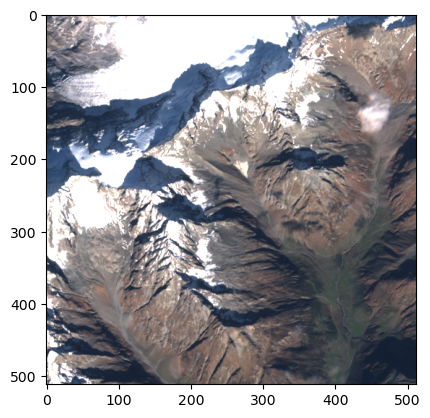

In [350]:
sample_image = image_paths[45]

import cv2
import matplotlib.pyplot as plt

org_img = cv2.imread(sample_image)
org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)

plt.imshow(org_img)
plt.show()

In [351]:
import numpy as np

IMG_SIZE = 512

def generate_clouds(num_clouds=300):

    # create a empty 512x512 image with 1 channel and 8 bit depth
    clouds = np.zeros((IMG_SIZE, IMG_SIZE, 1), np.float32)

    # pick a random coordinate pair
    x = np.random.randint(0, IMG_SIZE)
    y = np.random.randint(0, IMG_SIZE)

    for i in range(num_clouds):

        # randomly move the coordinate pair
        x += np.random.randint(-50, 50)
        y += np.random.randint(-50, 50)

        x %= (x + IMG_SIZE) # wrap around
        y %= (y + IMG_SIZE) # wrap around 

        # draw a circle with random radius at the random coordinate
        radius = np.random.randint(0, IMG_SIZE / 25)
        color = 255

        center = (x, y)
        cv2.circle(clouds, center, radius, color, -1)

    # blur the image
    clouds = cv2.blur(clouds, (75, 75))

    # normalize the image
    clouds = cv2.normalize(clouds, None, 0, 255, cv2.NORM_MINMAX)
    clouds /= 255.0

    return clouds   


In [316]:
def add_clouds(img, cloud_map):
    
    img = np.float32(org_img)
    cloud_map = np.float32(cloud_map)

    # convert the image to RGB, replacing the alpha channel with a white background
    bg = np.array([255, 255, 255])
    alpha = cloud_map.reshape(img.shape[:2] + (1,))
    img = ((bg * (alpha)) + (img[:, :, :3] * (1 - alpha)))

    img = np.int8(img)

    return img

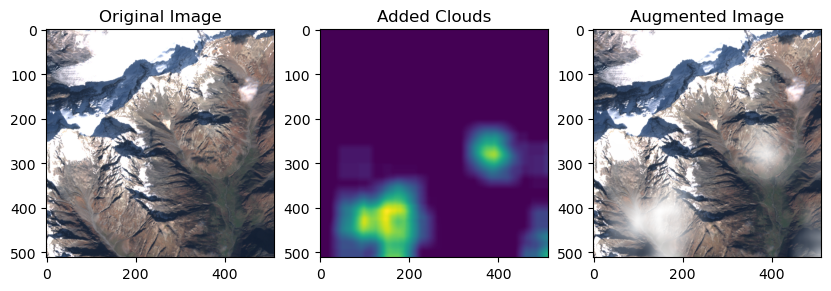

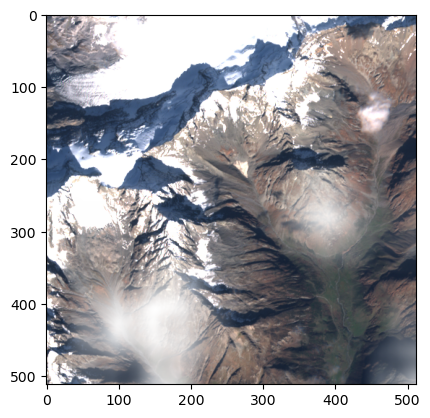

In [346]:

cloud_map = generate_clouds()
img = add_clouds(org_img, cloud_map)

# show the augmented image along with the original image (for comparison)
plt.figure(figsize=(10, 30))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(org_img.astype(np.uint8))

plt.subplot(1, 3, 2)
plt.title("Added Clouds")
plt.imshow(cloud_map.astype(np.float32))

plt.subplot(1, 3, 3)
plt.title("Augmented Image")
plt.imshow(img.astype(np.uint8))

plt.show()

# Show the image bigger
plt.imshow(img.astype(np.uint8))
